# Imports:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Model 1:

In [4]:
clean = pd.read_csv('../data/clean_train.csv')
clean.head()

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,0,109,533352170,60,RL,0.0,13517,0,None,IR1,...,0,0,None,None,None,0,3,2010,WD,130500
1,1,544,531379050,60,RL,43.0,11492,0,None,IR1,...,0,0,None,None,None,0,4,2009,WD,220000
2,2,153,535304180,20,RL,68.0,7922,0,None,Reg,...,0,0,None,None,None,0,1,2010,WD,109000
3,3,318,916386060,60,RL,73.0,9802,0,None,Reg,...,0,0,None,None,None,0,4,2010,WD,174000
4,4,255,906425045,50,RL,82.0,14235,0,None,IR1,...,0,0,None,None,None,0,3,2010,WD,138500


In [5]:
clean.drop(columns = 'Unnamed: 0', inplace=True)

In [6]:
clean.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,0,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,0,None,IR1,Lvl,...,0,0,None,None,None,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,0,None,Reg,Lvl,...,0,0,None,None,None,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,0,None,Reg,Lvl,...,0,0,None,None,None,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,0,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,138500


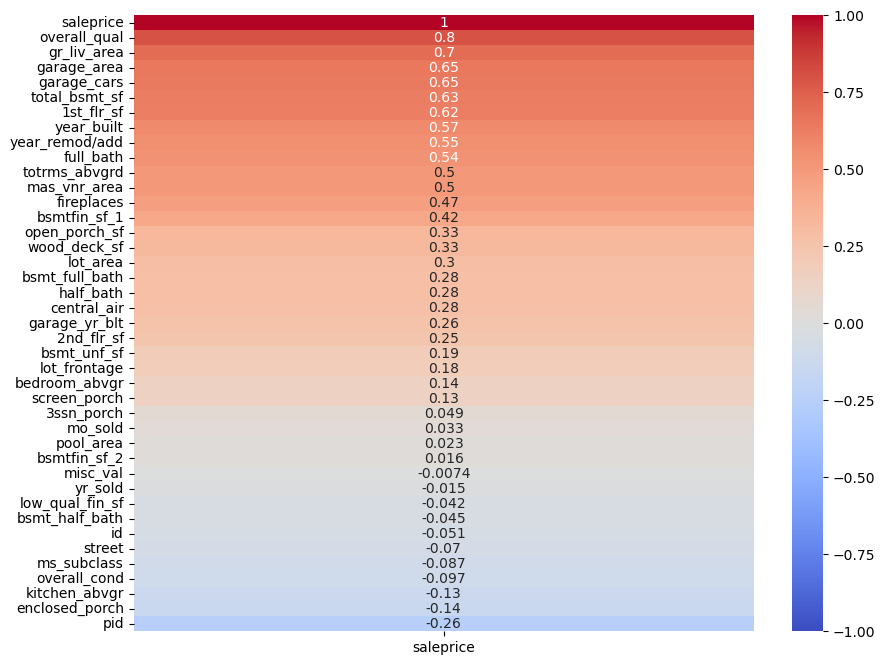

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(clean.corr(numeric_only=True)[['saleprice']].sort_values(by='saleprice', ascending=False), 
            annot=True,
           vmin=-1,
           vmax=1,
           cmap = 'coolwarm');

### Choosing X and y:

In [8]:
# for this first test I am going to choose the categories with a correlation of 0.5 and higher for my X values and see how that model works out
X = clean[['mas_vnr_area', 'totrms_abvgrd', 'full_bath', 'year_remod/add', 'year_built', '1st_flr_sf', 'total_bsmt_sf', 'garage_cars', 'garage_area', 'gr_liv_area', 'overall_qual']]
y = clean['saleprice']

In [9]:
X.shape

(2051, 11)

### Train-Test-Split / Evaluation:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=102)

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
print(f"Training R2 = {lr.score(X_train, y_train)}")
print(f"Testing R2 = {lr.score(X_test, y_test)}")

Training R2 = 0.7903118830364892
Testing R2 = 0.8143037189979443


> _The training R2 score tells me that 79.03% of the variability in sale price can be explained by the X variables_

> _The testing R2 score tells me that 81.43% of the variability in sale price can be explained by the X variables_

In [13]:
np.mean(cross_val_score(lr, X, y, cv=5))

0.7899706534998672

> _The mean cross_val score tells me that 79.0% of the variability in sale price can be explained by the X variables_

In [14]:
mean_squared_error(y_train, lr.predict(X_train))

1313589081.9800148

In [15]:
mean_squared_error(y_test, lr.predict(X_test))

1173937999.5385067

In [16]:
mean_squared_error(y, lr.predict(X))

1278659289.053397

> _While these MSE values are not human interpretable, I can use them to compare future models. The goal is to get the smallest MSE._

In [17]:
mean_absolute_error(y_train, lr.predict(X_train))

23835.585654304003

In [18]:
mean_absolute_error(y_test, lr.predict(X_test))

23199.550895050488

In [19]:
mean_absolute_error(y, lr.predict(X))

23676.499437094324

> _The MAE values tell me on average, how far my predictions are from the truth. These values can be used to compare future models_

### Creating Baseline:

In [20]:
base_preds = [clean['saleprice'].mean()] * len(y_test)

In [21]:
mean_absolute_error(y_test, base_preds)

57201.613483842324

In [22]:
mean_squared_error(y_test, base_preds)

6321947801.688222

In [23]:
mean_squared_error(y_test, base_preds, squared=False)

79510.67728103076

In [24]:
r2_score(y_test, base_preds)

-2.0610904602369473e-05

> _My model metrics show that it beats the baseline model_

### Fit data to all of the clean training data:

In [25]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [26]:
np.mean(cross_val_score(lr,X,y))

0.7899706534998672

### Make predictions on Testing Data:

In [27]:
clean_test = pd.read_csv('../data/clean_test.csv')

In [28]:
clean_test.head()

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,0,2658,902301120,190,RM,69.0,9142,0,Grvl,Reg,...,0,0,0,None,None,None,0,4,2006,WD
1,1,2718,905108090,90,RL,0.0,9662,0,None,IR1,...,0,0,0,None,None,None,0,8,2006,WD
2,2,2414,528218130,60,RL,58.0,17104,0,None,IR1,...,0,0,0,None,None,None,0,9,2006,New
3,3,1989,902207150,30,RM,60.0,8520,0,None,Reg,...,0,0,0,None,None,None,0,7,2007,WD
4,4,625,535105100,20,RL,0.0,9500,0,None,IR1,...,0,185,0,None,None,None,0,7,2009,WD


In [29]:
clean_test.drop(columns = 'Unnamed: 0', inplace=True)
clean_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,0,Grvl,Reg,Lvl,...,0,0,0,None,None,None,0,4,2006,WD
1,2718,905108090,90,RL,0.0,9662,0,None,IR1,Lvl,...,0,0,0,None,None,None,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,0,None,IR1,Lvl,...,0,0,0,None,None,None,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,0,None,Reg,Lvl,...,0,0,0,None,None,None,0,7,2007,WD
4,625,535105100,20,RL,0.0,9500,0,None,IR1,Lvl,...,0,185,0,None,None,None,0,7,2009,WD


In [30]:
preds = lr.predict(clean_test[['mas_vnr_area', 'totrms_abvgrd', 'full_bath', 'year_remod/add', 'year_built', '1st_flr_sf', 'total_bsmt_sf', 'garage_cars', 'garage_area', 'gr_liv_area', 'overall_qual']])
preds.shape

(878,)

### Create SalePrice column in Test Data:

In [31]:
clean_test['SalePrice'] = preds
clean_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,SalePrice
0,2658,902301120,190,RM,69.0,9142,0,Grvl,Reg,Lvl,...,0,0,None,None,None,0,4,2006,WD,154628.719992
1,2718,905108090,90,RL,0.0,9662,0,None,IR1,Lvl,...,0,0,None,None,None,0,8,2006,WD,205538.027838
2,2414,528218130,60,RL,58.0,17104,0,None,IR1,Lvl,...,0,0,None,None,None,0,9,2006,New,192405.566787
3,1989,902207150,30,RM,60.0,8520,0,None,Reg,Lvl,...,0,0,None,None,None,0,7,2007,WD,130062.964291
4,625,535105100,20,RL,0.0,9500,0,None,IR1,Lvl,...,185,0,None,None,None,0,7,2009,WD,185955.283200


### Create DataFrame with only ID and SalePrice columns from Test Data:

In [32]:
model_1_submission = clean_test[['id', 'SalePrice']].set_index('id')

In [33]:
model_1_submission.head()

,SalePrice
id,
2658,154628.719992
2718,205538.027838
2414,192405.566787
1989,130062.964291
625,185955.283200


### Save Submission:

In [34]:
# model_1_submission.to_csv('model_1_submission.csv')

# Model 2:

In [35]:
clean_train = pd.read_csv('../data/clean_train.csv')
clean_train.head()

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,0,109,533352170,60,RL,0.0,13517,0,None,IR1,...,0,0,None,None,None,0,3,2010,WD,130500
1,1,544,531379050,60,RL,43.0,11492,0,None,IR1,...,0,0,None,None,None,0,4,2009,WD,220000
2,2,153,535304180,20,RL,68.0,7922,0,None,Reg,...,0,0,None,None,None,0,1,2010,WD,109000
3,3,318,916386060,60,RL,73.0,9802,0,None,Reg,...,0,0,None,None,None,0,4,2010,WD,174000
4,4,255,906425045,50,RL,82.0,14235,0,None,IR1,...,0,0,None,None,None,0,3,2010,WD,138500


In [36]:
clean_train.drop(columns = 'Unnamed: 0', inplace=True)
clean_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,0,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,0,None,IR1,Lvl,...,0,0,None,None,None,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,0,None,Reg,Lvl,...,0,0,None,None,None,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,0,None,Reg,Lvl,...,0,0,None,None,None,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,0,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,138500


### Choosing X and y:

> **My husband and I are a recent homeowners. For this model I am going to choose variables that mattered the most to us when looking at houses**

In [37]:
X = clean_train[['lot_area', 'lot_config', 'bldg_type', 'overall_qual', 
                 'overall_cond', 'exter_qual', 'exter_cond', 'central_air', 
                 'gr_liv_area', 'full_bath', 'half_bath', 'bedroom_abvgr', 'garage_type',
                 'garage_cond', 'fence']]
y = clean_train['saleprice']

X.head()

,lot_area,lot_config,bldg_type,overall_qual,overall_cond,exter_qual,exter_cond,central_air,gr_liv_area,full_bath,half_bath,bedroom_abvgr,garage_type,garage_cond,fence
0,13517,CulDSac,1Fam,6,8,Gd,TA,1,1479,2,1,3,Attchd,TA,None
1,11492,CulDSac,1Fam,7,5,Gd,TA,1,2122,2,1,4,Attchd,TA,None
2,7922,Inside,1Fam,5,7,TA,Gd,1,1057,1,0,3,Detchd,TA,None
3,9802,Inside,1Fam,5,5,TA,TA,1,1444,2,1,3,BuiltIn,TA,None
4,14235,Inside,1Fam,6,8,TA,TA,1,1445,2,0,3,Detchd,TA,None


In [38]:
X.shape

(2051, 15)

> I have chosen 15 variable to base my model off of. This may be too many, resulting in an overfit model that will perform poorly. But, we will see!

### Train-Test-Split / Evaluation:

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=102)

In [40]:
ct = ColumnTransformer([
    ('oh', OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop = 'first'), ['lot_config', 'bldg_type', 'exter_qual', 'exter_cond', 'garage_type', 'garage_cond','fence'])
], remainder = 'passthrough')

In [41]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

/Users/kierstensouth/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
print(f"Training R2 = {lr.score(X_train, y_train)}")
print(f"Testing R2 = {lr.score(X_test, y_test)}")

Training R2 = 0.7949347742309076
Testing R2 = 0.8148194125884904


> _The training R2 score tells me that 79.49% of the variability in sale price can be explained by the X variables_

> _The testing R2 score tells me that 81.48% of the variability in sale price can be explained by the X variables_

> _These are improvements over model 1_

In [44]:
mean_squared_error(y_train, lr.predict(X_train))

1284629026.9797294

In [45]:
mean_squared_error(y_test, lr.predict(X_test))

1170677878.7714467

> _While these MSE values are not human interpretable, I can use them to compare models. These MSE values are an improvement to model 1 based on the fact that they are smaller._

In [46]:
mean_absolute_error(y_train, lr.predict(X_train))

23882.599084222904

In [47]:
mean_absolute_error(y_test, lr.predict(X_test))

23813.193163306947

> _The MAE values tell me on average, how far my predictions are from the truth. These MAE values are actually worse compared to my Model 1_

### Creating Baseline:

In [48]:
base_preds = [clean_train['saleprice'].mean()] * len(y_test)

In [49]:
mean_absolute_error(y_test, base_preds)

57201.613483842324

In [50]:
mean_squared_error(y_test, base_preds)

6321947801.688222

In [51]:
mean_squared_error(y_test, base_preds, squared=False)

79510.67728103076

In [52]:
r2_score(y_test, base_preds)

-2.0610904602369473e-05

> _My model metrics show that it beats the baseline model_

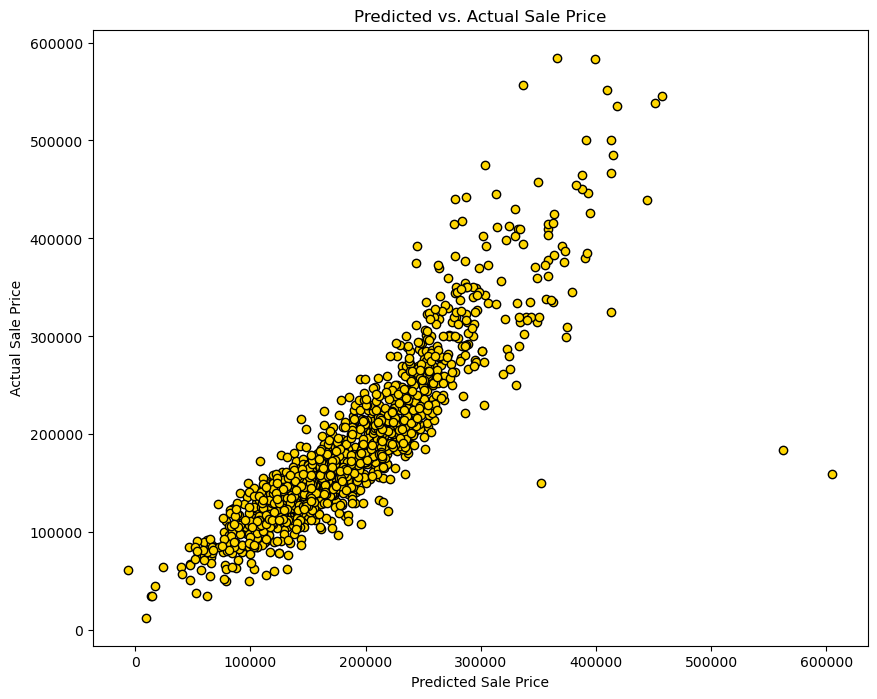

In [53]:
y_pred = lr.predict(X_train)

plt.figure(figsize = (10, 8))
plt.scatter(y_pred, y_train, color = 'gold', edgecolor = 'black')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price')
plt.title('Predicted vs. Actual Sale Price');

plt.savefig('Predicted_vs_Actual.png')

### Fit data to all of the clean training data:


In [54]:
X = ct.fit_transform(X)

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [55]:
np.mean(cross_val_score(lr,X,y))

0.7926973043217382

### Make predictions on Testing Data:

In [56]:
clean_test = pd.read_csv('../data/clean_test.csv')

In [57]:
clean_test.drop(columns = 'Unnamed: 0', inplace=True)
clean_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,0,Grvl,Reg,Lvl,...,0,0,0,None,None,None,0,4,2006,WD
1,2718,905108090,90,RL,0.0,9662,0,None,IR1,Lvl,...,0,0,0,None,None,None,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,0,None,IR1,Lvl,...,0,0,0,None,None,None,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,0,None,Reg,Lvl,...,0,0,0,None,None,None,0,7,2007,WD
4,625,535105100,20,RL,0.0,9500,0,None,IR1,Lvl,...,0,185,0,None,None,None,0,7,2009,WD


In [58]:
X_clean_test = clean_test[['lot_area', 'lot_config', 'bldg_type', 'overall_qual', 
                 'overall_cond', 'exter_qual', 'exter_cond', 'central_air', 
                 'gr_liv_area', 'full_bath', 'half_bath', 'bedroom_abvgr', 'garage_type',
                 'garage_cond', 'fence']]

X_clean_test.head()

,lot_area,lot_config,bldg_type,overall_qual,overall_cond,exter_qual,exter_cond,central_air,gr_liv_area,full_bath,half_bath,bedroom_abvgr,garage_type,garage_cond,fence
0,9142,Inside,2fmCon,6,8,TA,Fa,0,1928,2,0,4,Detchd,Po,None
1,9662,Inside,Duplex,5,4,TA,TA,1,1967,2,0,6,Attchd,TA,None
2,17104,Inside,1Fam,7,5,Gd,TA,1,1496,2,1,3,Attchd,TA,None
3,8520,Inside,1Fam,5,6,Gd,TA,1,968,1,0,2,Detchd,TA,None
4,9500,Inside,1Fam,6,5,TA,TA,1,1394,1,1,3,Attchd,TA,None


In [59]:
X_clean_test = ct.fit_transform(X_clean_test)


In [60]:
preds = lr.predict(X_clean_test)
preds.shape

(878,)

### Create SalePrice column in Test Data:

In [61]:
clean_test['SalePrice'] = preds
clean_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,SalePrice
0,2658,902301120,190,RM,69.0,9142,0,Grvl,Reg,Lvl,...,0,0,None,None,None,0,4,2006,WD,131623.125143
1,2718,905108090,90,RL,0.0,9662,0,None,IR1,Lvl,...,0,0,None,None,None,0,8,2006,WD,152707.987217
2,2414,528218130,60,RL,58.0,17104,0,None,IR1,Lvl,...,0,0,None,None,None,0,9,2006,New,222872.646901
3,1989,902207150,30,RM,60.0,8520,0,None,Reg,Lvl,...,0,0,None,None,None,0,7,2007,WD,140122.307635
4,625,535105100,20,RL,0.0,9500,0,None,IR1,Lvl,...,185,0,None,None,None,0,7,2009,WD,163621.491368


### Create DataFrame with only ID and SalePrice columns from Test Data:

In [62]:
model_2_submission = clean_test[['id', 'SalePrice']].set_index('id')
model_2_submission.head()

,SalePrice
id,
2658,131623.125143
2718,152707.987217
2414,222872.646901
1989,140122.307635
625,163621.491368


In [63]:
model_2_submission.shape

(878, 1)

### Save Submission:

In [64]:
# model_2_submission.to_csv('model_2_submission.csv')

# Model 3:

In [65]:
clean_train = pd.read_csv('../data/clean_train.csv')
clean_train.head()

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,0,109,533352170,60,RL,0.0,13517,0,None,IR1,...,0,0,None,None,None,0,3,2010,WD,130500
1,1,544,531379050,60,RL,43.0,11492,0,None,IR1,...,0,0,None,None,None,0,4,2009,WD,220000
2,2,153,535304180,20,RL,68.0,7922,0,None,Reg,...,0,0,None,None,None,0,1,2010,WD,109000
3,3,318,916386060,60,RL,73.0,9802,0,None,Reg,...,0,0,None,None,None,0,4,2010,WD,174000
4,4,255,906425045,50,RL,82.0,14235,0,None,IR1,...,0,0,None,None,None,0,3,2010,WD,138500


In [66]:
clean_train.drop(columns = 'Unnamed: 0', inplace=True)
clean_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,0,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,0,None,IR1,Lvl,...,0,0,None,None,None,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,0,None,Reg,Lvl,...,0,0,None,None,None,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,0,None,Reg,Lvl,...,0,0,None,None,None,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,0,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,138500


### Choosing X and y:

In [67]:
X = clean_train[['overall_qual', 'total_bsmt_sf', 'gr_liv_area', 'full_bath', 'half_bath', 'bedroom_abvgr', 
                'kitchen_qual', 'totrms_abvgrd', 'garage_cars', 'garage_area', 'lot_area', 
                 'lot_config', 'bldg_type', 'overall_cond', 'exter_qual', 'exter_cond', 'central_air', 
                 'garage_type', 'garage_cond', 'fence', 'pool_qc', 'pool_area', 'heating', 'heating_qc']]
y = clean_train['saleprice']

X.head()

,overall_qual,total_bsmt_sf,gr_liv_area,full_bath,half_bath,bedroom_abvgr,kitchen_qual,totrms_abvgrd,garage_cars,garage_area,...,exter_qual,exter_cond,central_air,garage_type,garage_cond,fence,pool_qc,pool_area,heating,heating_qc
0,6,725.0,1479,2,1,3,Gd,6,2.0,475.0,...,Gd,TA,1,Attchd,TA,None,None,0,GasA,Ex
1,7,913.0,2122,2,1,4,Gd,8,2.0,559.0,...,Gd,TA,1,Attchd,TA,None,None,0,GasA,Ex
2,5,1057.0,1057,1,0,3,Gd,5,1.0,246.0,...,TA,Gd,1,Detchd,TA,None,None,0,GasA,TA
3,5,384.0,1444,2,1,3,TA,7,2.0,400.0,...,TA,TA,1,BuiltIn,TA,None,None,0,GasA,Gd
4,6,676.0,1445,2,0,3,TA,6,2.0,484.0,...,TA,TA,1,Detchd,TA,None,None,0,GasA,TA


### Train-Test-Split / Evaluation:

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=102)

In [69]:
ct = ColumnTransformer([
    ('oh', OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop = 'first'), 
     ['overall_qual', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_qual', 'totrms_abvgrd', 
      'garage_cars', 'lot_config', 'bldg_type', 'overall_cond', 'exter_qual', 'exter_cond', 
     'garage_type', 'garage_cond','fence', 'pool_qc', 'heating', 'heating_qc'])
], remainder = 'passthrough')

In [70]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

/Users/kierstensouth/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [5, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [71]:
X_train.shape

(1538, 97)

In [72]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [73]:
print(f"Training R2 = {lr.score(X_train, y_train)}")
print(f"Testing R2 = {lr.score(X_test, y_test)}")

Training R2 = 0.8936647491006724
Testing R2 = 0.8378711576360676


> _The training R2 score tells me that 89.37% of the variability in sale price can be explained by the X variables_

> _The testing R2 score tells me that 83.79% of the variability in sale price can be explained by the X variables_

> _These are improvements over model 1 and 2_

In [74]:
mean_squared_error(y_train, lr.predict(X_train))

666136100.7656387

In [75]:
mean_squared_error(y_test, lr.predict(X_test))

1024948953.4478172

> _While these MSE values are not human interpretable, I can use them to compare models. These MSE values are an improvement to model 1 and 2 based on the fact that they are smaller._

In [76]:
mean_absolute_error(y_train, lr.predict(X_train))

17754.297233039822

In [77]:
mean_absolute_error(y_test, lr.predict(X_test))

20609.11464223889

> _The MAE values tell me on average, how far my predictions are from the truth. These MAE values and improvement to model 1 and 2 based on the fact that they are smaller._

### Creating Baseline:

In [78]:
base_preds = [clean_train['saleprice'].mean()] * len(y_test)

In [79]:
mean_squared_error(y_test, base_preds)

6321947801.688222

In [80]:
mean_absolute_error(y_test, base_preds)

57201.613483842324

In [81]:
mean_squared_error(y_test, base_preds, squared=False)

79510.67728103076

In [82]:
r2_score(y_test, base_preds)

-2.0610904602369473e-05

> _My model metrics show that it beats the baseline model_

### Fit data to all of the clean training data:


In [83]:
X = ct.fit_transform(X)

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [84]:
np.mean(cross_val_score(lr,X,y))

0.7998824115701133

### Make predictions on Testing Data:

In [86]:
clean_test = pd.read_csv('../data/clean_test.csv')

In [87]:
clean_test.drop(columns = 'Unnamed: 0', inplace=True)
clean_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,0,Grvl,Reg,Lvl,...,0,0,0,None,None,None,0,4,2006,WD
1,2718,905108090,90,RL,0.0,9662,0,None,IR1,Lvl,...,0,0,0,None,None,None,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,0,None,IR1,Lvl,...,0,0,0,None,None,None,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,0,None,Reg,Lvl,...,0,0,0,None,None,None,0,7,2007,WD
4,625,535105100,20,RL,0.0,9500,0,None,IR1,Lvl,...,0,185,0,None,None,None,0,7,2009,WD


In [88]:
X_clean_test = clean_test[['overall_qual', 'total_bsmt_sf', 'gr_liv_area', 'full_bath', 'half_bath', 'bedroom_abvgr', 
                'kitchen_qual', 'totrms_abvgrd', 'garage_cars', 'garage_area', 'lot_area', 
                 'lot_config', 'bldg_type', 'overall_cond', 'exter_qual', 'exter_cond', 'central_air', 
                 'garage_type', 'garage_cond', 'fence', 'pool_qc', 'pool_area', 'heating', 'heating_qc']]

X_clean_test.head()

,overall_qual,total_bsmt_sf,gr_liv_area,full_bath,half_bath,bedroom_abvgr,kitchen_qual,totrms_abvgrd,garage_cars,garage_area,...,exter_qual,exter_cond,central_air,garage_type,garage_cond,fence,pool_qc,pool_area,heating,heating_qc
0,6,1020,1928,2,0,4,Fa,9,1,440,...,TA,Fa,0,Detchd,Po,None,None,0,GasA,Gd
1,5,1967,1967,2,0,6,TA,10,2,580,...,TA,TA,1,Attchd,TA,None,None,0,GasA,TA
2,7,654,1496,2,1,3,Gd,7,2,426,...,Gd,TA,1,Attchd,TA,None,None,0,GasA,Ex
3,5,968,968,1,0,2,TA,5,2,480,...,Gd,TA,1,Detchd,TA,None,None,0,GasA,TA
4,6,1394,1394,1,1,3,TA,6,2,514,...,TA,TA,1,Attchd,TA,None,None,0,GasA,Gd


In [89]:
X_clean_test.shape

(878, 24)

In [90]:
X_clean_test = ct.transform(X_clean_test)

/Users/kierstensouth/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [4, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [91]:
preds = lr.predict(X_clean_test)
preds.shape

(878,)

### Create SalePrice column in Test Data:

In [92]:
clean_test['SalePrice'] = preds
clean_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,SalePrice
0,2658,902301120,190,RM,69.0,9142,0,Grvl,Reg,Lvl,...,0,0,None,None,None,0,4,2006,WD,134729.702768
1,2718,905108090,90,RL,0.0,9662,0,None,IR1,Lvl,...,0,0,None,None,None,0,8,2006,WD,172364.030042
2,2414,528218130,60,RL,58.0,17104,0,None,IR1,Lvl,...,0,0,None,None,None,0,9,2006,New,192044.708721
3,1989,902207150,30,RM,60.0,8520,0,None,Reg,Lvl,...,0,0,None,None,None,0,7,2007,WD,131085.287813
4,625,535105100,20,RL,0.0,9500,0,None,IR1,Lvl,...,185,0,None,None,None,0,7,2009,WD,177811.714268


### Create DataFrame with only ID and SalePrice columns from Test Data:

In [93]:
model_3_submission = clean_test[['id', 'SalePrice']].set_index('id')
model_3_submission.head()

,SalePrice
id,
2658,134729.702768
2718,172364.030042
2414,192044.708721
1989,131085.287813
625,177811.714268


In [94]:
model_3_submission.shape

(878, 1)

### Save Submission:

In [ ]:
# model_3_submission.to_csv('model_3_submission.csv')